# Deep learning and AI methods
## Final Project: Crowd Counting with a Multi-Column Convolutional Neural Network
* Instructor: [Krzysztof Podgorski](https://krys.neocities.org),  [Statistics, Lund University, LUSEM](https://www.stat.lu.se/)
* Authors: [Thomas Pegoraro](https://www.linkedin.com/in/tom-pegoraro), [Oliver Serenhov](https://www.linkedin.com/in/oliverserenhov), [Willian Trindade Leite](https://www.linkedin.com/in/williantleite/)

In this project we build upon the knowledge acquired during the Deep Learning and AI Methods course. We use tensorflow to build a convolutional neural network to count how many people are in a single image. The overall inspiration for this project came from observing how the official number of people attending protests (or festivals) varied depending on which organization counted it. To our surprise, this has been a well studied field within AI methods, with the most prominent article being ["Single-Image Crowd Counting via Multi-Column Convolutional Neural Network (2016)"](http://people.eecs.berkeley.edu/~yima/psfile/Single-Image-Crowd-Counting.pdf). Here we show a *Tensorflow* and *Keras* application of the architecture suggested in the article over a traditional data set for this type of problem ([UCSD Anomaly Detection Dataset](http://www.svcl.ucsd.edu/projects/anomaly/dataset.html)).



### Background

In a discussion in class we realized that crowd counts of protests or even attendants of festivals can vary a lot depending on which organization counts it. The organizers of a protest and the police might have different goals and techniques for crowd number estimations that one could argue to be biased. Therefore, we tried to find datasets that could mimic the type of problem at hand, and we tried to find methods that could use deep neural networks to count or estimate the amount of people. The literature is rich, but the most influential article seems to be the one writen by Yingying Zhang, Desen Zhou, Siqin Chen, Shenghua Gao, and Yi Ma (2016) from Shanghaitech University.

While our approach is heavily based on their work we decided for a much simpler framework with clear shortcomings that are not found in the mentioned article. For example, our neural network works specifically for the UCSD dataset, meaning that it is perspective arbitrary, and therefore not generalizible to other datasets. Another issue is that to make things simpler we chose a counting method that is much less sophisticated and yield less precise results. 

### The Data

THE UCSD Anomaly Detection Dataset consists of almost 20000 images of pedestrians. The pictures are but frames of short videos, making it ideal for object tracking studies. In fact, the original purpose of the dataset was for anomaly detections, with the anomalies in question being bycicles, carts, etc. We were somewhat naïve in the start thinking we would be able to load the 20000 images to run our model, but we quickly realized that neither of our computers had enough memory to run it over the whole dataset. Reducing the resolution was not a good idea either given that the images are pixelated enough as they are and given the lack of colors it could be hard to identify features with a lower resolution. Another problem encountered with this dataset was the lack of annotation regarding the number of people in each image. This, in fact, was the biggest hurdle regarding this project and some of the early coding attempts we did (like the *File Manager* presented in this report) became pointless once we realized the data was not annotated. Luckily, [Ma Zhenwei](https://github.com/CommissarMa) has made available an [annotated subset of the UCSD dataset](https://drive.google.com/file/d/1Xfna_1Pki6JGfvyWH5COnfB-rt2o0lXA/view?usp=sharing) in his [Crowd Counting from Scratch](https://github.com/CommissarMa/Crowd_counting_from_scratch) github repository. The subset contains 2000 images which is also providential given that seems to be the exact number of images our computers could load.

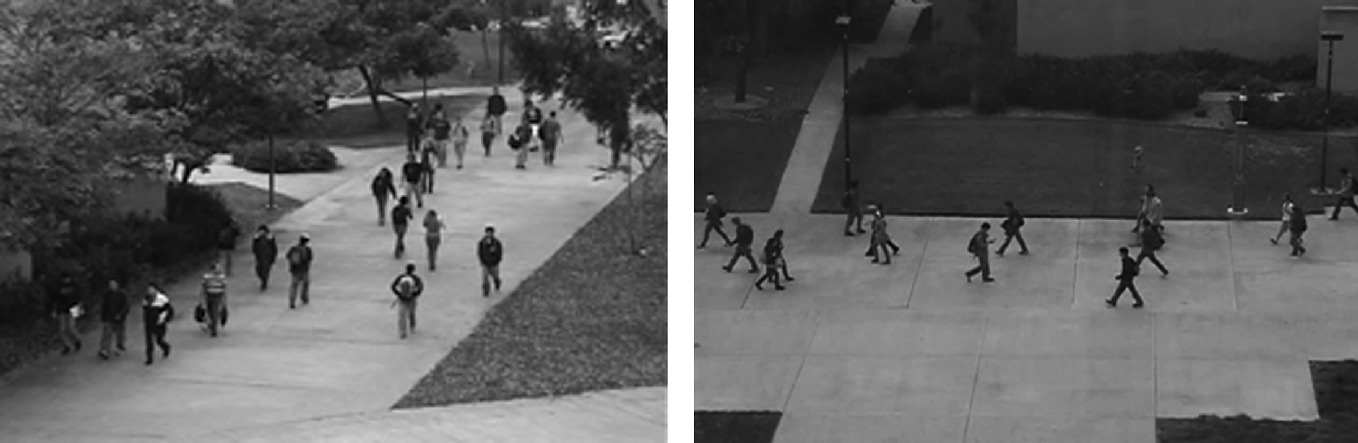

### Methodology

We assume here the reader is well acquainted with the concept of deep neural networks, especially in what concerns feed foward neural networks and convolutional neural networks. The novelty in this method is in creating three simultaneous convolutional columns that are aggregated in the end of the model, to be eventually fed into a feed forward neural network. The concept here is that each column is trained towards finding a specific size of head (since we are counting people counting heads is sufficient). Being able to detect different head sizes is necessary because of occlusion and perspective. People closer to the camera will be portrayed with larger heads than those away from the camera, but they should be counted equally. Therefore, we train one column with large filters to detect large features, another column with medium filters for detecting medium features, and lastly a column with small filters for detecting small features. These are then aggregated, flatenned and fed into a feed forward neural net with one hidden layer with 128 nodes and an output layer with 53 nodes. A few attempts were made with different post-aggregation FFNN but this model seemed to perform better.

The columns follow a simple architecture of convolutional layer followed by max pooling repeated twice and then convolved another two times before aggregation (as can be seen in the following figure). The less sophisticated method chosen for counting uses the annotations of how many people were there in the image as classes, and then using a softmax function at the output layer to allow the neural network to "count" the image based on the number class it has. The more sophisticated method proposed in the before-mentioned article, for example, suggests the creation of a density map based on the annotations (which are in the form of coordinates of the center point of each head in an image). These density maps are then compared to the estimate density maps generated by the multi-column convolutional neural network using euclidean (squared) distance, this is also why the more sophisticated method is not perspective arbitrary and thus generalizible to other datasets.

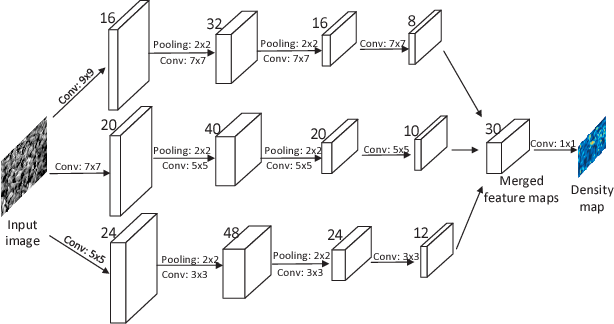

While the architecture applied here is heavily based on the one presented in the mentioned article, the implementation on tensorflow was largely adapted from the strategy used by [Chompakorn Chaksangchaichot](https://github.com/tann9949) in his [vCanteen Crowd Estimator](https://github.com/tann9949/vCanteen-crowd-estimator-keras). The syntax used is a bit more clean in comparison to the one used in our previous labs for this course, and it also offered a better way of aggregating the different columns in the end. Of course, we had to adapt how the aggregated convoluted features were fed into a feed forward neural network since we used a simple "classification count".

### Application

#### Preparing the data

The original dataset included around 18,000 images, and they were seperated into 70 different folders pre-separated into train and test (at a 50/50 proportion).  Originially, our intension was to use all of the data, but for us to use the images, they needed to come from a single folder (so we could ourselves decide on the size of the train, validation, and test sets).  In the `file_manager()` function we used `os.walk` to go through all of the folders with images, and use the `shutil` to copy the images into a new folder. 

The `file_manager()` function was successful at sorting images, although due to the higher pixel count [158x238] we could not use all of the reorganized images since it crashed python when over 2000 images were utilized.  This and the lack of annotations in the original dataset are the main reasons we opted for using the annotated subset mentioned before that consists of 2000 images.

In [1]:
# File manager function

# In our first attempt for this project we tried to use the entire data set of images. The code below was used to 
# copy the images into a new folder where they could be stored in one folder instead of several, which was the case
# originally. The images are also re-named, based on which directory the image came from to avoid duplicate names. 

import os, shutil

def file_manager(file_source_dir, file_destination_dir):
  for root, subdirs, files in os.walk(file_source_dir):
    for file_name in files:
      if os.path.join(root, file_name).endswith('.tif'):
        shutil.copy(os.path.join(root, file_name), os.path.join(file_destination_dir, root.split("\\")[-1] + file_name))
  return("Success")

file_manager(r'...\UCSDped1\Test', 
             r'...\ped1\Test')

'Success'

#### Preparing Images

In the `pixelation_normalization()` function below, we begin by setting key variables of the images (column size, and row size).  The UCSD subset we used to train, validate and test our model consists of 2000 158x238 images in black and white. Therefore, column size and row size are set to 158 and 238.  If you tested on different images with different resolution these variables would need to be adjusted. 

We then select the image directory folder, and  use the `glob` package along with the `PIL` (Python imagery library) to extract the images in the folder.  This function extracts the images, converts them to a one colour template and resizes them according to column and row size. The images then are transformed into a numpy array and normalized.  

The final `images` variable returns 2000 images with a normalized range from [0,1], resized so the images appear with dimensions [158,238].

In [2]:
# Pixelation and normalization function

import glob
import numpy as np
from PIL import Image

#Pixel size of images
col_size = 238
row_size = 158

img_dir= r'...\UCSD\ucsd\images' # Image directory

def pixelation_normalization(col_size, row_size, img_dir):
    img_np = []
    for filename in glob.iglob(f'{img_dir}/*'):
        image = np.array(Image.open(filename).convert('L').resize((col_size,row_size)))
        img_np.append(image)
    
    images = np.array(img_np) # Converts to numpy array
    images = images/255  # Normalizes images
    return images

images = pixelation_normalization(col_size, row_size, img_dir)

#### Annotation

The code below extracts the annotation of the images using the `glob.iglob` function, by looping through the annotation directory folder.  

The annotation gives the number of people seen in each image, and the exact pixel coordinates of each person's head center in the image. To simplify things, i.e., not to have to procuce a density map, we decided to use only the number of people rather than coordinates. As mentioned this imposes several limitations to our model such as making it limited to the abitrary perspective of the data it is trained on, and an overall lower accuracy than it would get with a density map approach, but given the time constraints for this project we chose for this simpler approach.

The annotation function was also used to create the `label` variable, containing the number of heads in each picture. This was done so by selecting only the number of coordinates in each annotation rather than saving the coordinates themselves.

In [3]:
# Annotation function

ann_dir= r'...\UCSD\ucsd\annotations'

ann_np = []
for filename in glob.iglob(f'{ann_dir}/*'):
  ann_np.append(np.load(filename, mmap_mode='r'))
  
labels = np.zeros(shape = 2000)
for i in range(2000):
    labels[i] = len(ann_np[i]) # Creates the labels that represent the real number of people seen in each image

print('The maximum number of people in an image is: {0:.0f}'.format(float(max(labels)))) # 52 is the maximum number of people in an image
print('The minimum number of people in an image is: {0:.0f}'.format(float(min(labels)))) # 13 is the minimum number of people in an image.

The maximum number of people in an image is: 52
The minimum number of people in an image is: 13


#### Setting training, validation, and test sets of the data.

Rather than resorting to tensorflow's `.shuffle()` we decided to apply a `permutation()` to randomize the indices used to create the subsets. The main idea in randomizing here is to guarantee that the model is not learning from sequential patterns in the data. This also guarantess that a person who might appear in two different images (and could potentially end in both the training and testing sets) will not interefere in how the model recognizes the number of people. For example, if a person with a striped shirt appeared in two different video sequences, and in one of them there were 8 people, it could be that the model would learn that whenever it sees a striped pattern there will be 8 people in the picture. Randomizing the position of pictures helps us avoid these problems.

`images_train` are the 1400 images in the training dataset (70% of the total).

`images_valid`are the 300 images in the validation dataset (15% of the total).

`images_test` are the 300 images in the test dataset (15% of the total).



In [4]:
## Separating train, validation and test subsets

import tensorflow as tf

np.random.seed(1)
index = np.random.permutation(images.shape[0])
train_index, valid_index, test_index = index[:1400], index[1400:1700], index[1700:]
images_train = tf.data.Dataset.from_tensor_slices((images[train_index,:,:], labels[train_index]))
images_valid = tf.data.Dataset.from_tensor_slices((images[valid_index,:,:], labels[valid_index]))
images_test = tf.data.Dataset.from_tensor_slices((images[test_index, :,:], labels[test_index]))

#### Visualizing one image after the data processing

Below is a "pixelized" and normalized picture ready to be fed into the multi-column convolutional neural network.

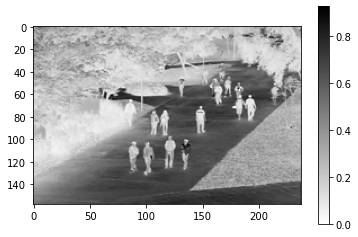

In [5]:
## Checking the pixelized images

import matplotlib.pyplot as plt

for image, label in images_train.take(1):
  break
image = image.numpy().reshape((158,238))
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)

#### Modelling

Below we define the three columns of our multi-column convolutional neural network. As mentioned in the methodology section there is a column for large features detection, and two more for medium and small feature detections respectively. After defining the three columns they are aggregated in the end in a new `x` variable.

In [6]:
# Defing the columns in the Multi-Column Convolutional Neural Network

from keras.layers import Dense, Input, Conv2D, MaxPooling2D, concatenate, Flatten
from keras.models import Model
import cv2
import time
import datetime
import keras
import math
from keras import models
import requests

input1 = Input(shape=(158, 238, 1))
    
# Large
xl = Conv2D(16, kernel_size = 9, padding = 'same', activation = 'relu')(input1)
xl = MaxPooling2D(pool_size = 2)(xl)
xl = Conv2D(32, kernel_size = 7, padding = 'same', activation = 'relu')(xl)
xl = MaxPooling2D(pool_size = 2)(xl)
xl = Conv2D(16, kernel_size = 7, padding = 'same', activation = 'relu')(xl)
xl = Conv2D(8, kernel_size = 7, padding = 'same', activation = 'relu')(xl)

# Medium
xm = Conv2D(20, kernel_size = 7, padding = 'same', activation = 'relu')(input1)
xm = MaxPooling2D(pool_size = 2)(xm)
xm = Conv2D(40, kernel_size = 5, padding = 'same', activation = 'relu')(xm)
xm = MaxPooling2D(pool_size = 2)(xm)
xm = Conv2D(20, kernel_size = 5, padding = 'same', activation = 'relu')(xm)
xm = Conv2D(10, kernel_size = 5, padding = 'same', activation = 'relu')(xm)

# Small
xs = Conv2D(16, kernel_size = 5, padding = 'same', activation = 'relu')(input1)
xs = MaxPooling2D(pool_size = 2)(xs)
xs = Conv2D(32, kernel_size = 3, padding = 'same', activation = 'relu')(xs)
xs = MaxPooling2D(pool_size = 2)(xs)
xs = Conv2D(16, kernel_size = 3, padding = 'same', activation = 'relu')(xs)
xs = Conv2D(8, kernel_size = 3, padding = 'same', activation = 'relu')(xs)

x = concatenate([xm, xs, xl])

#### Compiling the model



In [7]:
out = Flatten()(x)
out = Dense(128, activation = 'relu')(out)
#out = Dense(64, activation = 'relu')(out) We experimented with adding an additional hidden layer, but the results did not improve model accuracy.
out = Dense(53, activation = 'softmax')(out)

model = Model(inputs=input1, outputs=out)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#### Fitting the model 

After careful analysis we realized that a batch size of 25 was sufficient to reduce jumping around in the gradient without causing memory problems for our computers. From the analysis the number of epochs was also sufficient at 10 since the training loss and validation loss seem to indicate there was no serious overfitting in our model.

In [8]:
BATCH_SIZE = 25
images_train = images_train.repeat().batch(BATCH_SIZE) #I have shuffled it already in the start
images_valid = images_valid.batch(BATCH_SIZE)
images_test = images_test.batch(BATCH_SIZE)

# Fitting the model

np.random.seed(1)
history = model.fit(images_train, epochs=10, steps_per_epoch=math.ceil(1400/BATCH_SIZE), validation_data = images_valid)
#training accuracy around 93%


Epoch 1/10
56/56 [==============================] - 90s 2s/step - loss: 3.3890 - accuracy: 0.1164 - val_loss: 2.7635 - val_accuracy: 0.2700
Epoch 2/10
56/56 [==============================] - 89s 2s/step - loss: 1.7573 - accuracy: 0.5393 - val_loss: 1.2125 - val_accuracy: 0.7067
Epoch 3/10
56/56 [==============================] - 91s 2s/step - loss: 0.7893 - accuracy: 0.7707 - val_loss: 0.9300 - val_accuracy: 0.7300
Epoch 4/10
56/56 [==============================] - 90s 2s/step - loss: 0.4807 - accuracy: 0.8557 - val_loss: 0.5837 - val_accuracy: 0.8400
Epoch 5/10
56/56 [==============================] - 90s 2s/step - loss: 0.3519 - accuracy: 0.8857 - val_loss: 0.4941 - val_accuracy: 0.8367
Epoch 6/10
56/56 [==============================] - 89s 2s/step - loss: 0.2666 - accuracy: 0.9021 - val_loss: 0.5354 - val_accuracy: 0.8567
Epoch 7/10
56/56 [==============================] - 89s 2s/step - loss: 0.2333 - accuracy: 0.9243 - val_loss: 0.6814 - val_accuracy: 0.8200
Epoch 8/10
56/56 [==

#### Final results

Our first attempt used the same three columns shown here but had a slightly different feed forward neural network after aggregating the columns. On our first attempt the post-aggregation feed forward neural net had two hidden layers where the first had 128 nodes, the second 64 nodes, and 53 nodes in the output layer. That model yielded a training accuracy of 91% and a test accuracy around 80%. After a few more attempts with different models we landed in one in which the post-aggregation FFNN has one hidden layer with 128 nodes and the output layer with 53 nodes. This model had simialr results with 94% training accuracy and 80% test accuracy. The results were consistent as we ran these models a few times in each computer and got similar results in most iterations, therefore, we opted for the simpler model.

In [9]:
test_loss, test_accuracy = model.evaluate(images_test, steps=math.ceil(300/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)  # Test accuracy around 86%
print('Loss on test dataset:', test_loss)

12/12 [==============================] - 3s 270ms/step - loss: 0.6587 - accuracy: 0.8033
Accuracy on test dataset: 0.8033333420753479
Loss on test dataset: 0.6586752533912659


Below we visualize the development of the training and validation losses and accuracy, and compare it to the final test loss and accuracy.

       loss  accuracy  val_loss  val_accuracy  epoch
0  3.389022  0.116429  2.763537      0.270000      0
1  1.757329  0.539286  1.212526      0.706667      1
2  0.789253  0.770714  0.930019      0.730000      2
3  0.480750  0.855714  0.583706      0.840000      3
4  0.351856  0.885714  0.494134      0.836667      4
5  0.266604  0.902143  0.535436      0.856667      5
6  0.233332  0.924286  0.681393      0.820000      6
7  0.195950  0.929286  0.702158      0.823333      7
8  0.206301  0.938571  0.651537      0.836667      8
9  0.169575  0.940714  0.569645      0.840000      9


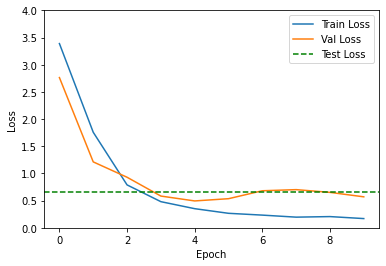

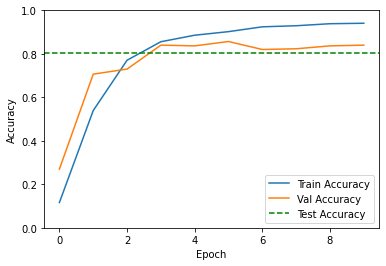

In [10]:
import pandas as pd

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist)

# Plotting the train and valiation for both the loss and the accuracy.

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],
             label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],
             label = 'Val Loss')
    plt.axhline(y=test_loss, label='Test Loss', color='g', linestyle='--')
    plt.ylim([0,4])
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
             label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],
             label = 'Val Accuracy')
    plt.axhline(y=test_accuracy, label = 'Test Accuracy', color='g', linestyle='--')
    plt.ylim([0,1])
    plt.legend()
    plt.show()
    
plot_history(history)

### Limitations 

With this project, the main limitation that we encountered was lack of data processing power.  This limitation of memory on our computers, combined with the number and pixel size of images, caused python to crash. Another major limitation is the small set of annotated data.  With only 2000 images, and using the same camera angle, we have not created a very flexible crowd counting algorithm.  With fewer images, we could not train the data on a very significant dataset, and the test dataset of images could be easily impacted by outliers.  Overall preformance and consistency in the results would improve if we used a larger test and validation set as well.


## Conclusion

As mentioned by the article, Multi-Column Convolutional Neural Networks are very efficient at accurately counting people in a single-image. The simplification we chose did affect the efficiency of the counting if compared to the results presented in the article, but these could also be due to the use of a smaller dataset. Of course, we could try reducing the resolution to use more images, but given the nature of what we are trying to identify in the images, reducing the resolution would most likely result in worse performance. Matter of fact, of all the articles and applications we studied for this project we did not find a single one that reduced resolution of these datasets. Heads in pictures are small enough already, we suppose.

It is important to emphasize that due to the methodology choice made by us in what concerns the post-aggregation FFNN our model is not transferrable to other datasets, or even to other perspectives. This means that even if all the other 16000 images in the UCSD dataset were annotated we would only be able to use this model to predict those that had the same angle/perspective as the images used for training. This would not be the case had we used the density map approach proposed in the mentioned article.

In light of the labs, we did manage to improve the accuracy of our model by playing around with the number of hidden layers and nodes. The improvement was quite acentuated when compared to models that had two hidden layers which is very interesting. Overall, this has been a challenging project, but quite fufilling when we realized it could count people to an acceptable level, and it certainly can help other people understand the concepts behind crowd counting with deep neural networks, and the underlying concepts of multi-column convolutional neural networks which was the main innovation in this project compared to the labs we did during the course. 

### Future Research:

Due to time constraints, combined with the computational demand of the model we created, we did not use k-fold cross-validation.  Instead we used a portion of the images (300) to use for the validation set.  Although, with only 2000 images at our disposal, it would be better to instead use cross-validation sets to test how well each model preforms, and use those 300 images to train the Convolutional Neural Network.  For a future project at a similar level, it is recommended to use cross-validation sets instead of a validation set.

As previously mentioned in the conclusion, this study only used images from one of 2 cameras, and does not use any of the 16,000 images.  If you can use a computer with more computational power, there could be a way to train the model using a combination of both datasets into a multi-column neural network, which would then train on both sets of images.  This could be useful as combining multiple cameras images could allow a more flexible model to provide an accurate crowd counting algorithm for various images at different camera angles.

Lastly, future research (at our level) should definitely go into understanding how to produce density maps, and how to apply the method presented here in the same fashion as is suggested in the article, since they seemed to have outperformed most methods used for crowd counting until then. Such an approach would also remove the limitations regarding the perspective limitation, or the lack of transferability to new datasets, since the article explicitly says that they had obtained good results by training the model with one set, and testing on another.
